In [2]:

import numpy as np
import pandas as pd
import h5py
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
with h5py.File("data/full_dataset_vectors.h5", "r") as data:    
    # Split the data into training/test features/targets
    x_train = data["X_train"][:]
    y_train = data["y_train"][:]
    x_test = data["X_test"][:] 
    y_test = data["y_test"][:]


In [4]:
log_reg = LogisticRegression(multi_class = 'ovr', )
log_reg.fit(x_train,y_train)


c:\Users\richg\miniconda3\envs\hello\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\Users\richg\miniconda3\envs\hello\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [5]:
#eval the model
y_pred=log_reg.predict(x_test)
print("Accuracy: ", log_reg.score(x_test,y_test))

Accuracy:  0.588


In [6]:

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.695     0.818     0.751       170
           1      0.891     0.913     0.902       252
           2      0.587     0.478     0.527       232
           3      0.529     0.509     0.519       214
           4      0.542     0.527     0.535       220
           5      0.520     0.443     0.478       174
           6      0.529     0.523     0.526       174
           7      0.551     0.571     0.561       198
           8      0.464     0.539     0.499       178
           9      0.468     0.500     0.483       188

    accuracy                          0.588      2000
   macro avg      0.578     0.582     0.578      2000
weighted avg      0.587     0.588     0.586      2000



<AxesSubplot:>

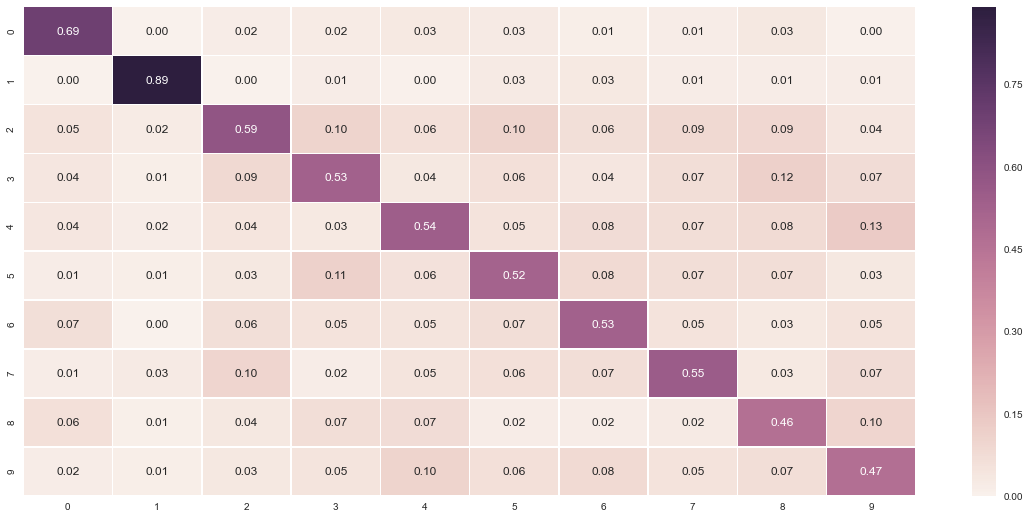

In [7]:
confusion_matrix_result = confusion_matrix(y_test , y_pred , normalize='pred')
df_cm = pd.DataFrame(confusion_matrix_result, index=range(10), columns=range(10))
plt.figure(figsize=(20, 9))
sns.heatmap(df_cm, annot=True, linewidths=0.5, fmt=".2f")